# Homework 1

***Author:*** Christiaan van Roon - 11122854 - Informatica

In [1]:
from math import sqrt, pi, exp, log10
import scipy.special as sp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import csv

## Problem 1

### Question 1.1

In [2]:
seed = 276783

def randint(a, c, m):
    global seed
    seed = (a * seed + c ) % m
    return seed

### Question 1.2

In [3]:
def rand():
    number = randint(1664525, 1013904223, (2**32))
    return number / ((2**32))

### Question 1.3

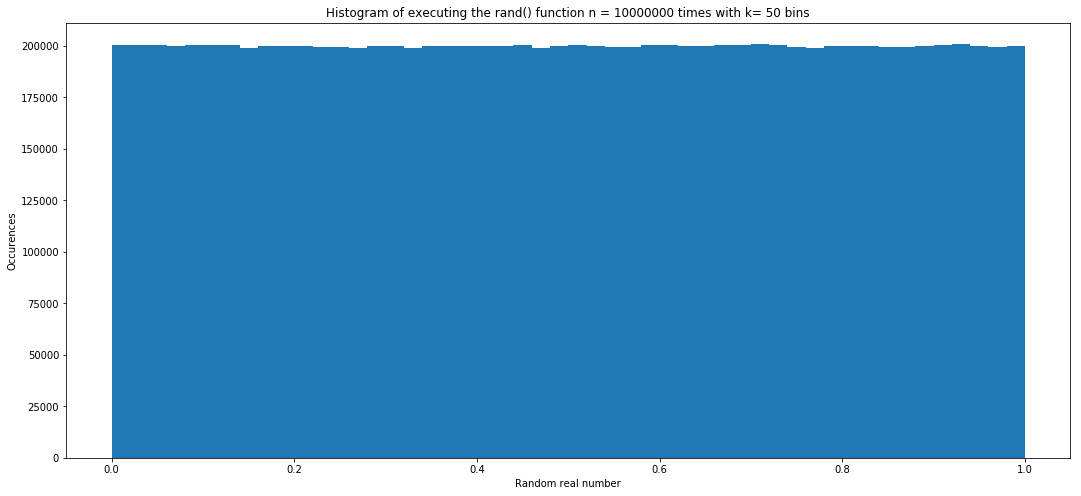

In [4]:
k = 50
n = 10**7

x = [rand() for x in range(0, n)]

plt.figure(figsize=(18, 8))
values, bins, patches = plt.hist(x, k)
plt.xlabel('Random real number')
plt.ylabel('Occurences')
plt.title('Histogram of executing the rand() function n = ' + str(n) + ' times with k= ' + str(k) + ' bins')
plt.show()

### Question 1.4

**a**. The distribution by which the height of the individual bins are distributed is a binomial distribution. The parameters of this distribution are the number of trials and the probability of success, the number of trials is $n$ in this case and the probability of success is equal to $\frac{1}{k}$ because there are $k$ bins in a range from $[0,1)$  
  
**b**. The expected mean of this distribution is the probability of success multiplied with the amount of trials, thus in this case $n \cdot \frac{1}{k}$. The expected standard deviation is $\sqrt{n\frac{1}{k} \cdot (1 - \frac{1}{k})}$

In [5]:
print(values)

[ 200424.  200616.  200546.  199917.  200337.  200602.  200729.  198991.
  200090.  200121.  199878.  199702.  199482.  199167.  200157.  199863.
  199236.  199808.  200022.  199864.  199830.  200189.  200250.  199083.
  200125.  200265.  200168.  199368.  199714.  200352.  200279.  200147.
  199945.  200392.  200347.  201155.  200266.  199541.  199075.  200142.
  199909.  199967.  199673.  199567.  199820.  200299.  200773.  200172.
  199623.  200012.]


**c**. You can see the list of bin heights above. The actual values for the histogram are displayed below.

In [6]:
def mean(values):
    return sum(values) / len(values)


def std(values):
    mean_value = mean(values)
    diff = [x - mean_value for x in values]
    diff_squared = [x ** 2 for x in diff]
    return sqrt(sum(diff_squared) / len(values))

print('Mean: ' + str(mean(values)))
print('Standard Deviation: ' + str(std(values)))

Mean: 200000.0
Standard Deviation: 456.31817846761265


When calculating the mean and standard deviation following the formula's stated above results in the following:  
Mean = $n \cdot \frac{1}{k} = 10^{7} \cdot \frac{1}{50} = 200000$  
  
Standard Deviation = $\sqrt{n\frac{1}{k} \cdot (1 - \frac{1}{k})} = \sqrt{10^{7}\frac{1}{50} \cdot (1 - \frac{1}{50})} = 442.7188$
  
We can clearly see that the mean is exactly the same, where the standard deviation is within the $20\%$ error margin.

**d**. The distribution converges towards a poisson distribution when the number of trials approximates infinity and the probability of success approaches zero (This hapens when k becomes very big). The mean of this distribution can be expressed in the following way: $\lambda = n \cdot p$. The standard deviation is expressed by: $\sqrt{\lambda} = \sqrt{n \cdot p}$  
When testing these values against the real values we can see that the value of the mean did not change, the new theoretical value of the standard deviation now becomes: $\sqrt{\lambda} = \sqrt{n \cdot p} = \sqrt{n \cdot \frac{1}{k}} = \sqrt{10^{7} \cdot \frac{1}{50}} = 447.2135955$ This value is still in the $20\%$ margin and thus passes the test.

## Problem  2

### Question 2.1

The formula for the probability density function (PDF) for a normal distributed random variable is where $f(x)dx = Pr( x < X < x + dx)$ is equal to:
$$\int_{x}^{x + dx} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(q - \mu)^2}{2\sigma^2}}dq$$
  
The formula for the cumulative distribution function (CDF) for a normal distributed random variable is:
$$\int_{-\infty}^{x} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(q - u^2)}{2\sigma^2}}dq$$

### Question 2.2

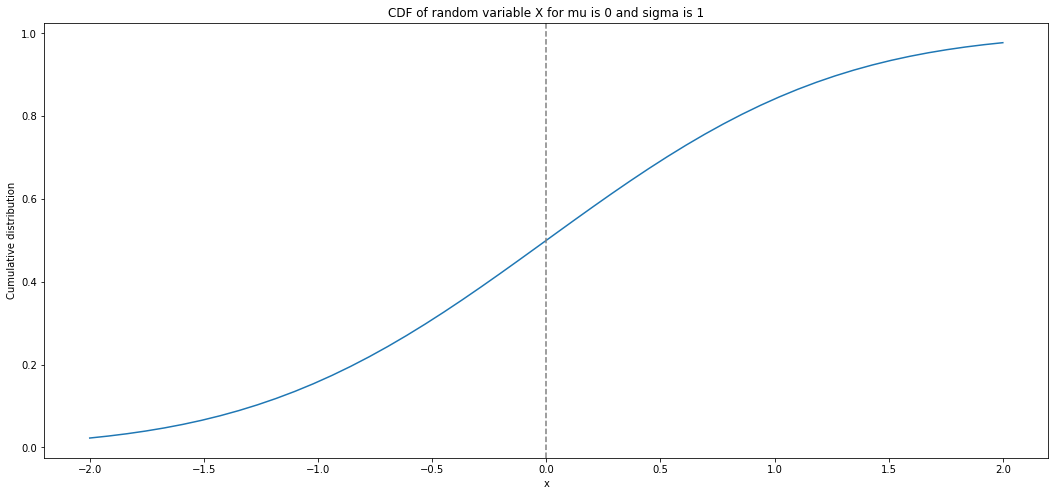

In [7]:
mu = 0
sigma = 1
x = np.linspace(mu - 2 * sigma, mu + 2 * sigma)

def cdf(mu, sigma, x):
    return 0.5 * (1 + sp.erf((x-mu) / (sigma * sqrt(2))))

y = [cdf(mu, sigma, i) for i in x]

plt.figure(figsize=(18, 8))
plt.plot(x,y)
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('CDF of random variable X for mu is ' + str(mu) + ' and sigma is ' + str(sigma))
plt.xlabel('x')
plt.ylabel('Cumulative distribution')
plt.show()

**i**. The numbers that should have the highest probability are the numbers that are close around the mean, in this graph this is indicated by the inflection point. When looking at this exact same values in the graph of a Probability density function you can see that this are values that are close around the mean.

**ii**. Numbers that are further away from the mean in the Probability Density Function graph, and thus are further away from the inflection point in this graph are the values that have lower probability being sampled.

### Question 2.3

To compute the probability $Pr(X =x)$ from a Cumulative Distribution Function we should simply calculate the inverse function and feed our values for x into it. This function is called the Quantile function.
The result will be the needed probability. To get a normal distributed RNG we generate n samples with our uniform distributed RNG between 0, 1. These n samples represent the probabilities needed for the normal distribution, then we use the quantile function to get x values corresponding to this probabilities and then look at the distribution of those x values. This will result in a normal distribution.

### Question 2.4

As said above we need the inverse CDF formula. We can derive this in the following way, given that:  
$$CDF = 0.5 \cdot (1  + erf(\frac{x - \mu}{\sigma \sqrt{2}}))$$
Lets use a variable p to denote the probability of $X=x$, then:
$$p = 0.5 \cdot (1  + erf(\frac{x - \mu}{\sigma \sqrt{2}}))$$
$$2 \cdot p - 1 = erf(\frac{x - \mu}{\sigma \sqrt{2}})$$
$$erf^{-1}(2 \cdot p - 1) = \frac{x - \mu}{\sigma \sqrt{2}}$$
$$x = \mu + \sigma \cdot \sqrt{2} \cdot erf^{-1}(2\cdot p - 1)$$
When implemented in python, this results in the following code:

In [8]:
def quantile(mu, sigma, p):
    return mu + sigma * sqrt(2) * sp.erfinv(2 * p -1)

def randnorm(mu, sigma):
    return quantile(mu, sigma, rand())

### Question 2.5

The following python code plots a histogram for the values stated in the plottitle.

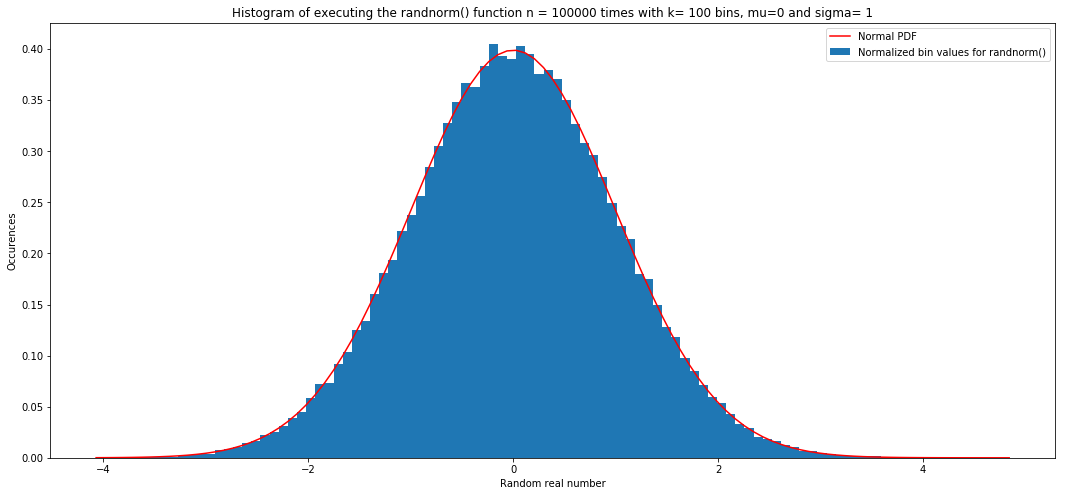

In [9]:
n = 10**5
k = 100
mu = 0
sigma = 1

x = [randnorm(mu, sigma) for x in range(0, n)]
plt.figure(figsize=(18, 8))
values, bins, patches = plt.hist(x, k, normed=True, label='Normalized bin values for randnorm()')
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r', label='Normal PDF') 
plt.legend()
plt.xlabel('Random real number')
plt.ylabel('Occurences')
plt.title('Histogram of executing the randnorm() function n = ' + str(n) + ' times with k= ' + str(k) + ' bins, mu=' + str(mu)+ ' and sigma= ' +str(sigma))
plt.show()


Then we execute the same test as in the previous problem, we generate $10^5$ samples with $\mu = 0$ and $\sigma = 1$ and then look if the mean and standard deviation are within $20\%$ error margin.

In [10]:
n = 10**5
mu = 0
sigma = 1
x = [randnorm(mu, sigma) for i in range(0, n)]

The theoretical mean of a normal distribution is equal to $\mu$ and its standard deviation is equal to $\sigma$, now we check if the deviation from these values is within the 20% error margin.

In [11]:
res_mean = mean(x)
res_std = std(x)
print('Mu is ' + str(mu))
print('Resulting mean is ' + str(res_mean))
print('This means a difference of ' + str(abs((mu / res_mean * 100))) + ' %\n')
print('Sigma is ' + str(sigma))
print('Resulting Standard deviation is ' + str(res_std))
print('This means a difference of ' + str(abs(100 -(sigma / res_std) * 100)) + ' %')

Mu is 0
Resulting mean is 0.0019870618955
This means a difference of 0.0 %

Sigma is 1
Resulting Standard deviation is 0.9985860082861551
This means a difference of 0.14159939175111447 %


As we can see, the resulting values are within the $20\%$ error margin

## Problem 3

In [12]:
fin = open('nutrient.csv', 'r')
csvr = csv.reader(fin)
samples = [row for row in csvr]
samples = [list(map(float, s)) for s in samples]

#make array slicing easier
samples = np.array(samples) 

### Question 3.1

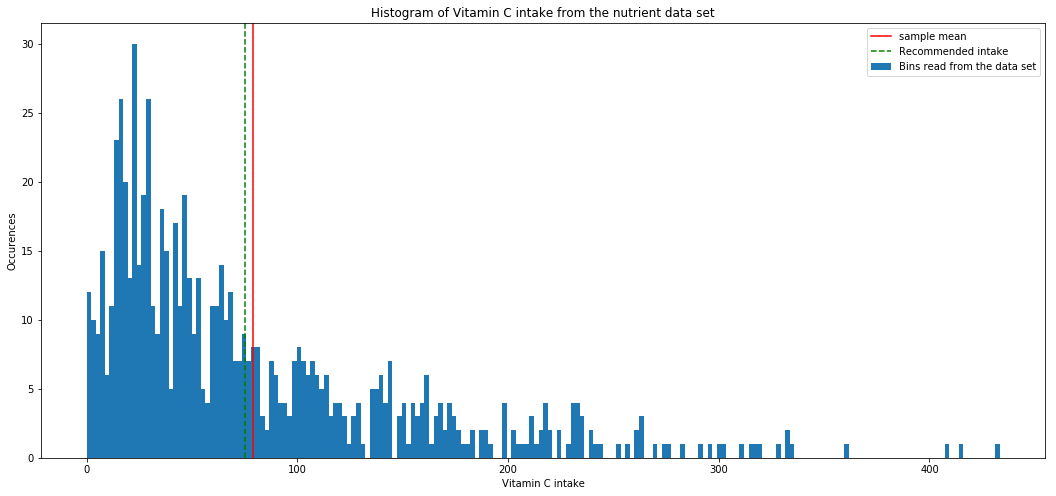

In [63]:
vitC = samples[:,-1]
sample_mean = mean(vitC)
recommended_val = 75
plt.figure(figsize=(18, 8))
plt.hist(vitC, 200, label='Bins read from the data set')
plt.axvline(x = sample_mean, label='sample mean', color='r')
plt.axvline(x = recommended_val, label='Recommended intake', color='g', linestyle='--')
plt.title('Histogram of Vitamin C intake from the nutrient data set')
plt.xlabel('Vitamin C intake')
plt.ylabel('Occurences')
plt.legend()
plt.show()

Yes, you can expect that the data is sampled from a population from which the mean is equal or very close to the recommended Vitamin C intake. In the histogram we can see that the sampling mean is very close to the recommended intake but it is still a bit off. If this difference is not to big, you can say that this is within the sampling error, and thus the mean of all the sampling means should be even closer to the recommended value. We cannot state that this is true because we do not have enough different samples to verify this. It is very hard to conclude something about the population's mean by only looking at this histogram.

### Question 3.2

First something about the three terms themselves:

$Pr(\vec{x}^{\,} \mid\mu', \sigma')$, this is the probability that the vector x would be the resulting values for a model that uses $\mu'$ and $\sigma'$ as parameters.  
$Pr(\mu', \sigma')$, this is the probability that $\mu'$ and $\sigma'$ are the parameters of the model that is used  
$Pr(\vec{x}^{\,})$, this is the probability that the $\vec{x}^{\,}$ represents the list of observed values. 
  
The last two terms are unconditional probabilities and thus only depending on themselves.  
  
Bayes' Theorem states that the following holds:  
$Pr(\mu', \sigma' \mid \vec{x}^{\,}) = \frac{Pr(\mu', \sigma', \vec{x}^{\,})}{Pr(\vec{x}^{\,})} = \frac{Pr(\vec{x}^{\,} \mid \mu', \sigma') \times Pr(\mu', \sigma')}{Pr(\vec{x}^{\,})}$

### Question 3.3

When $Pr(\vec{x}^{\,})$ and $Pr(\mu', \sigma')$ are both uniformly distributed, then the division of both terms will always result in a constant $C$. That is why it is more common to factor out this division and multiply the term $Pr(\vec{x}^{\,} \mid \mu', \sigma')$ with a constant $C$.

### Question 3.4

$$Pr(\mu', \sigma' \mid \vec{x}^{\,}) = Pr(\vec{x}^{\,} \mid \mu', \sigma') \cdot C$$ means that the probability that $\mu'$ and $\sigma'$ are the parameters of the generating model is equal to the probability that $\vec{x}^{\,}$ is the resulting vector when $\mu'$ and $\sigma'$ are in fact that parameters multiplied with a unknown constant C. Because this constant $C$ is a constant factor between two uniformly distributed variables ,as we assumed, we leave it out of the equation and say that the probabilities are propotional to each other. This is denoted in the following way:
$$Pr(\mu', \sigma' \mid \vec{x}^{\,}) \propto Pr(\vec{x}^{\,} \mid \mu', \sigma')$$

### Question 3.5

We can infer from this that the values of $\mu'$ and $\sigma'$ of $Pr(\mu', \sigma' \mid \vec{x}^{\,})$ are closer to $L(78,3 \mid \vec{x}^{\,})$ than to $L(80, 4 \mid \vec{x}^{\,})$ but we cannot state if the values of $\mu'$ and $\sigma'$ are in between the two values or still smaller than $L(78,3 \mid \vec{x}^{\,})$

### Question 3.6

We need to multiply every probability of $x_i$ given $\mu'$ and $\sigma'$ with each other to get the total probability of the $\vec{x}^{\,}$ vector. This can be written down in the following way:
$$Pr(\vec{x}^{\,} \mid \mu', \sigma') = \Pi^{n}_{i = 0} Pr(x_i \mid \mu', \sigma')$$

### Question 3.7

In [51]:
def normal_pdf(mu, sigma, x):
    return (1 / sqrt(2 * np.pi * (sigma ** 2))) * np.exp(-1 * (((x - mu) ** 2) / (2 * sigma ** 2)))

def likelihood(mu, sigma, samples):
    mu = np.float128(mu)
    result = 1
    for i in samples:
        result *= normal_pdf(mu, sigma, i)
    
    return result

print('Likelihood of N(78,3) = ' + str(likelihood(78, 3, vitC)))
print('Likelihood of N(80,4) = ' + str(likelihood(78, 3, vitC)))

Likelihood of N(78,3) = 0.0
Likelihood of N(80,4) = 0.0


### Question 3.8

In [52]:
for i in vitC:
    print(normal_pdf(78, 3, i))

2.45008097012e-15
8.65640029199e-70
2.37905821099e-146
0.0
0.0817053887211
2.19781515714e-103
7.55381828313e-160
1.68041632328e-64
1.50231993704e-20
1.81924684838e-118
4.8984248536e-42
4.22132703875e-78
6.6548793774e-93
5.38251880408e-16
0.00293257963477
2.81184395547e-14
0.0
1.86612712779e-218
3.38887048894e-135
2.36632010192e-47
1.12853986589e-05
5.83118638557e-97
4.6215328922e-111
1.96280580444e-20
1.24759816632e-98
2.99242896975e-08
3.1099465413e-63
8.07224874518e-32
0.0
0.0
1.7211264483e-219
6.84017281663e-56
2.12359345146e-92
3.44729044437e-35
4.96620218516e-184
0.000485700905597
0.0
5.68942468629e-27
1.92561969441e-22
5.82405765643e-81
3.4992617365e-52
5.14535008723e-73
1.04895101319e-64
1.80610870298e-05
9.37663619296e-42
8.50922231538e-105
1.17299998411e-19
2.50845680597e-30
4.0204069536e-64
7.11404677155e-82
2.22831715665e-99
5.7608331484e-10
1.82077290474e-42
9.70034285847e-132
2.60625101618e-18
0.000182341123206
3.86812029349e-135
2.04976821146e-10
8.64192075422e-103
8.6035

The order of magnitude is dependent on the orders of magnitude of every single probability density value, we can see that every signle value lies between 0 and 1. This means that the maximum magnitude of a number is -1. Then there are a lot of values that have magnitude smaller than -1, taking into account the amount of samples, this results in at least b = -737c as magnitude of the resulting number where c is a unknown constant.

### Question 3.9

It does not matter if we maximize the likelihood or use the log-likelihood function to estimate the MLE, because the log function is monotonically increasing function which means that it is entirely non-decreasing and thus makes it possible to find the values with the best MLE.

### Question 3.10

In [54]:
def log_likelihood(mu, sigma, samples):
    mu = np.float128(mu)
    result = 0
    for i in samples:
        tmp = normal_pdf(mu, sigma, i)
        result += np.log10(tmp)
    
    return result

print(log_likelihood(78, 3, list(vitC)))

-96842.1320676


The assignment states that is has to be somewhere around $log_{10}(10^{-97487}) = -97487$ and thus this likelihood seems about right

### Question 3.11

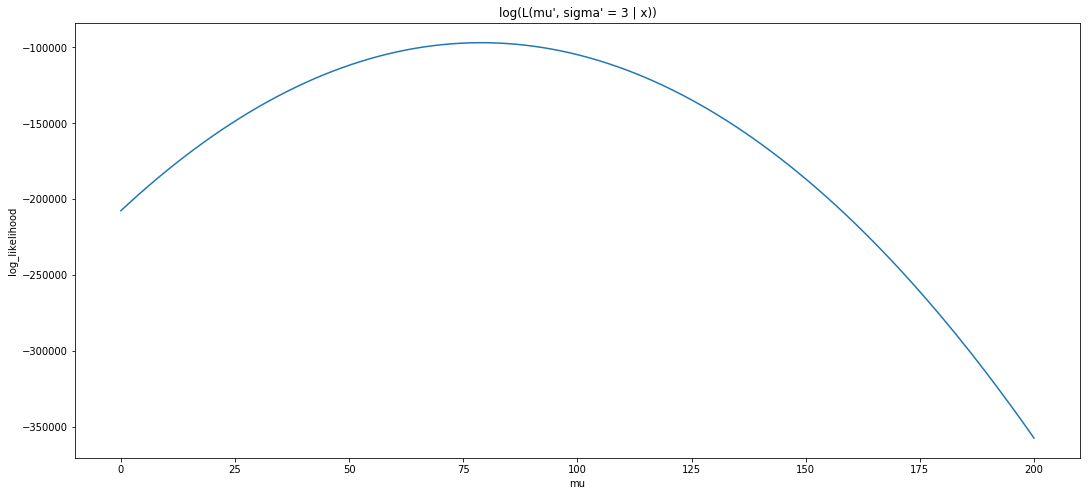

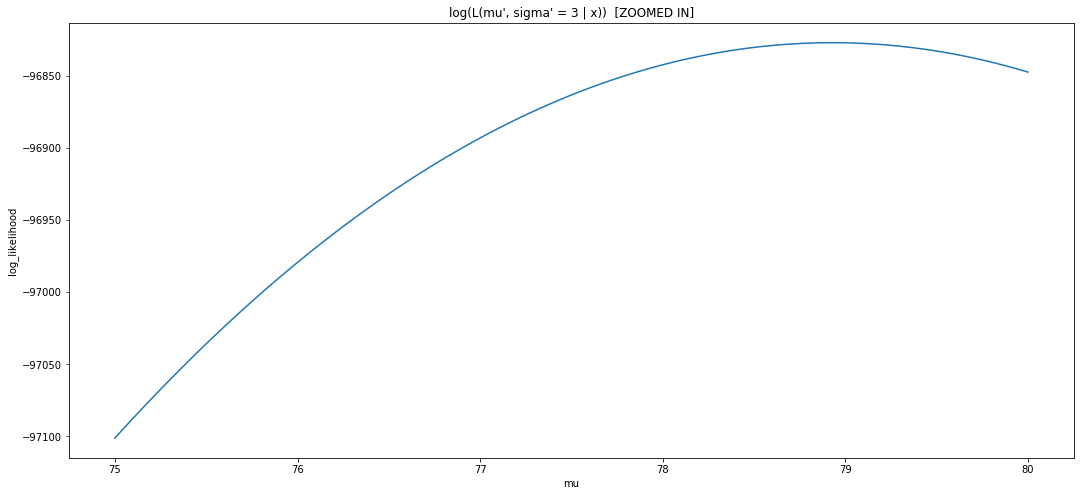

In [56]:
x1 = np.linspace(0, 200, 200)
y1 = [log_likelihood(i, 3, vitC) for i in x1]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\', sigma\' = 3 | x))')
plt.plot(x1,y1)
plt.xlabel('mu')
plt.ylabel('log_likelihood')
plt.show()

x1 = np.linspace(75, 80, 200)
y1 = [log_likelihood(i, 3, vitC) for i in x1]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\', sigma\' = 3 | x))  [ZOOMED IN]')
plt.xlabel('mu')
plt.ylabel('log_likelihood')
plt.plot(x1, y1)
plt.show()

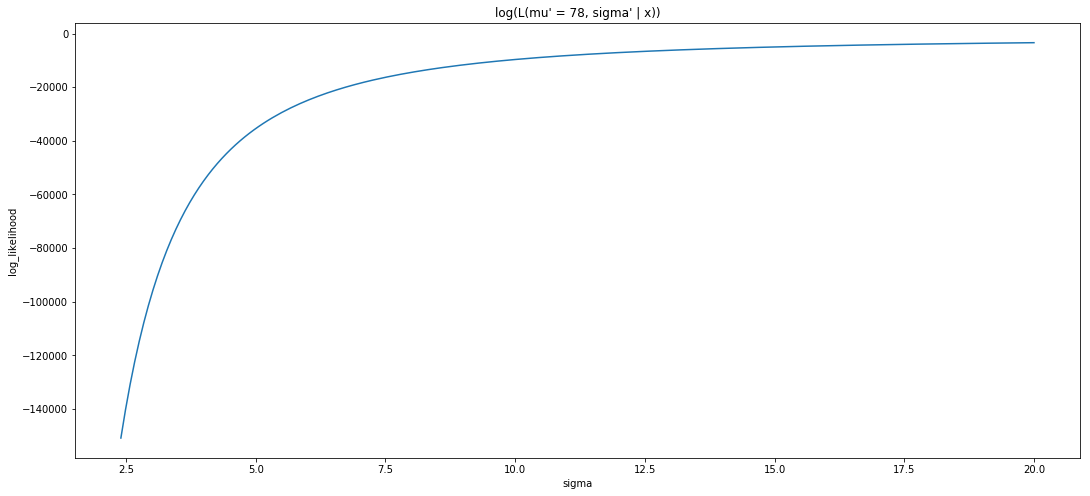

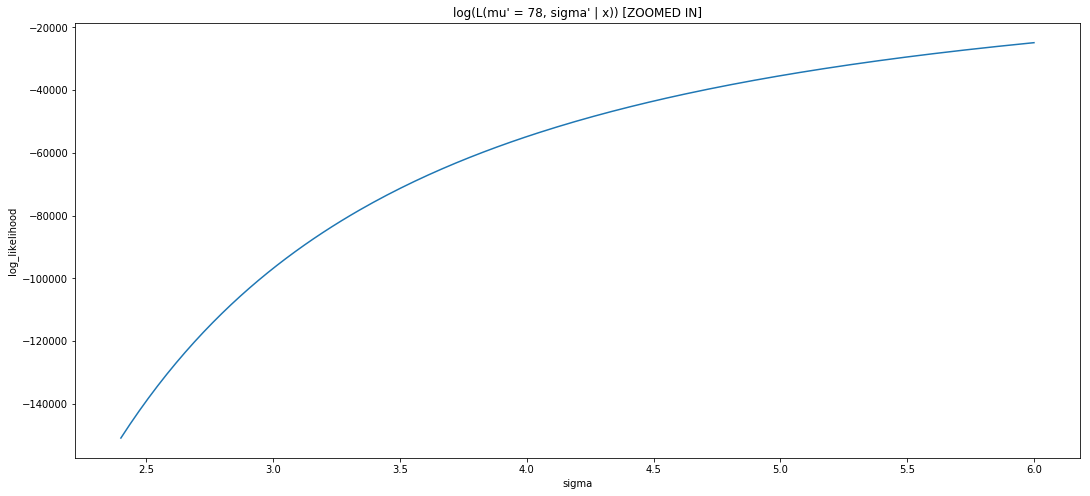

In [57]:
x2 = np.linspace(2.4, 20, 200)
y2 = [log_likelihood(78, i, vitC) for i in x2]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\' = 78, sigma\' | x))')
plt.xlabel('sigma')
plt.ylabel('log_likelihood')
plt.plot(x2,y2)
plt.show()

x2 = np.linspace(2.4, 6, 200)
y2 = [log_likelihood(78, i, vitC) for i in x2]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\' = 78, sigma\' | x)) [ZOOMED IN]')
plt.xlabel('sigma')
plt.ylabel('log_likelihood')
plt.plot(x2,y2)
plt.show()

In the first two plots we can see that likelihood function of a value of 3 for sigma, the MLE for mu looks to be at approximately 79. In the second plots the sigma is plotted against the log_likelihood for a value for mu of 78, the MLE for sigma then looks to be at approximately 3.5

### Question 3.12

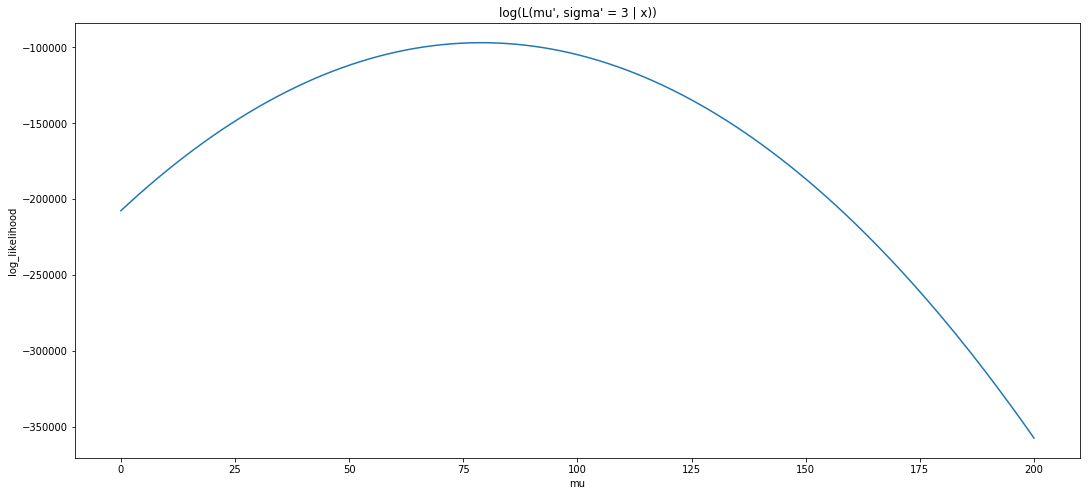

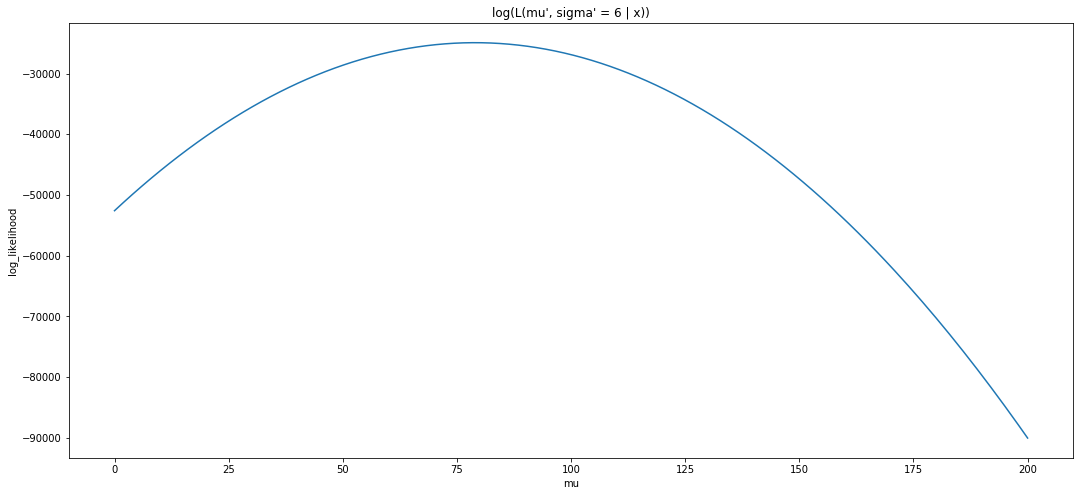

In [58]:
x1 = np.linspace(0, 200, 200)
y1 = [log_likelihood(i, 3, vitC) for i in x1]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\', sigma\' = 3 | x))')
plt.plot(x1,y1)
plt.xlabel('mu')
plt.ylabel('log_likelihood')
plt.show()

x2 = np.linspace(0, 200, 200)
y2 = [log_likelihood(i, 6, vitC) for i in x2]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\', sigma\' = 6 | x))')
plt.plot(x2,y2)
plt.xlabel('mu')
plt.ylabel('log_likelihood')
plt.show()


At first glance the initial value of $\sigma'$ does not seem to matter much to the flow of the plot, but when you look more closely you can see that log_likelihood of the second plot are way higher and there is less difference between log_likelihood of 2 sequential x-values. But the thing we are interested in is if the MLE of $\mu'$ changes a lot when changing $\sigma'$, it looks like this is not the case and thus the initial value of $\sigma'$ does not influence the MLE of $\mu'$ much. 

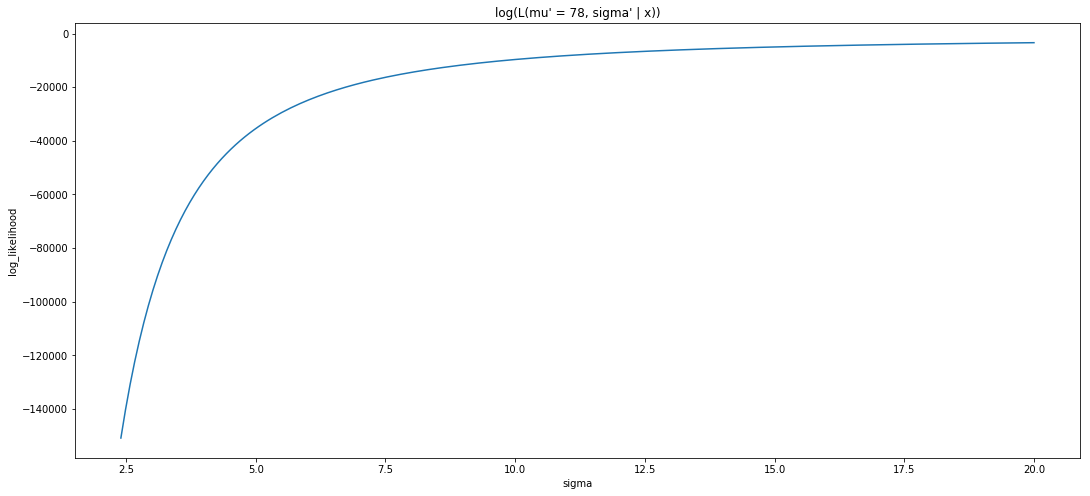

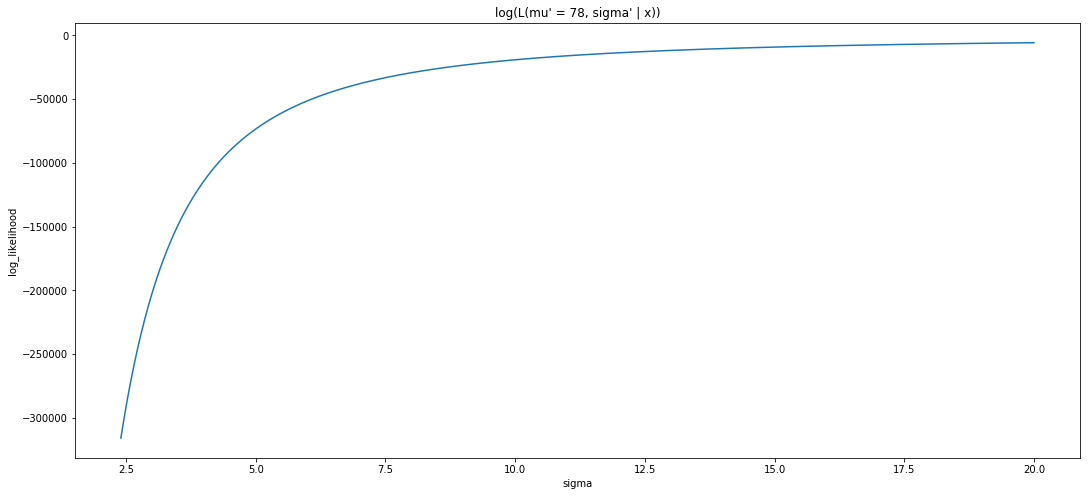

In [59]:
x1 = np.linspace(2.4, 20, 200)
y1 = [log_likelihood(78, i, vitC) for i in x1]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\' = 78, sigma\' | x))')
plt.xlabel('sigma')
plt.ylabel('log_likelihood')
plt.plot(x1,y1)
plt.show()

x2 = np.linspace(2.4, 20, 1000)
y2 = [log_likelihood(78*2, i, vitC) for i in x2]
plt.figure(figsize=(18, 8))
plt.title('log(L(mu\' = 78, sigma\' | x))')
plt.xlabel('sigma')
plt.ylabel('log_likelihood')
plt.plot(x2,y2)
plt.show()


In this case we can see that changing the initial value of $\mu'$ actual changes the MLE of $\sigma'$ significantly as we can see the curve in this graph moves more to the right. The initial value of $\mu'$ actually is important to test first before testing for $\sigma'$

### Question 3.13

As stated in the question the first (partial) derivatives of minima and maxima are equal to zero, we are gonna use this in our derivation of the formula's for $\mu'$ and $\sigma'$.
Lets start by stating what the formula for the log likelihood written in terms of $n, \sigma, x_i$ and $\mu$
$$l = -\frac{n}{2} \cdot ln(2\pi) - \frac{n}{2} \cdot ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{j = 1}^{n}(x_j - \mu)^2$$

Take the first order derivative, derived towards $\mu$:
$$\frac{d}{d\mu}l = \frac{1}{\sigma^2}\sum_{j=1}^{n}(x_j - \mu)$$
$$\frac{d}{d\mu}l = \frac{1}{\sigma^2}(\sum_{j=1}^{n}x_j  - n\mu)$$
$$\frac{1}{\sigma^2} n\mu = \frac{1}{\sigma^2}\sum_{j=1}^{n}x_j$$
$$n\mu = \sum_{j=1}^{n}x_j$$
$$\mu= \frac{1}{n}\sum_{j=1}^{n}x_j$$

Now do approximately the same for the first order derivative, derived towards $\sigma^2$:
$$\frac{d}{d\sigma^2}l = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}(\sum_{j=1}^{n}(x_j - \mu)^2)$$
$$ = \frac{1}{2\sigma^2}(\frac{1}{\sigma^2}\sum_{n}^{j=1}(x_i - \mu)^2) - n$$
$$n = \frac{1}{2\sigma^2}(\frac{1}{\sigma^2}\sum_{n}^{j=1}(x_i - \mu)^2)$$
$$\sigma^2 = \frac{1}{n}\sum_{j=1}^{n}(x_j - \mu)^2$$
And thus:
$$\sigma = \sqrt{\frac{1}{n}\sum_{j=1}^{n}(x_j - \mu)^2}$$

### Question 3.14

In both derivations this would be in the second to last step, there you can clearly see that you are just simply summing over the values of the $\vec{x}^{\,}$ vector.

### Question 3.15

As said we are looking for the Confidence Interval (CI) for the standard normal distribution which uses $\mu = 0$ and $sigma = 1$. Following the 68-95-99.7 rule the interval where the probability for the real value of $\mu$ is $95\%$ or higher is within 2 standard deviations of the mean, thus the values for $\beta$ are: $[\mu - 2\sigma, \mu + 2\sigma]$

### Question 3.16

We use the equations of Quetstion 3.14 to show that when multiplying each $x_j$ sample value with a constant $c$ results in having to multiply the mean and standard deviation with the same constant.
The formula for the mean of a standard normal distribution is equal to 
$$\mu= \frac{1}{n}\sum_{j=1}^{n}x_j$$ Now we multiply each $x_i$ sample value with $c$:
$$\mu'= \frac{1}{n}\sum_{j=1}^{n}(x_jc)$$
$$\mu'= \frac{1}{n}c\sum_{j=1}^{n}x_j$$
$$\mu'= c\frac{1}{n}\sum_{j=1}^{n}x_j$$
$$\mu'= c \cdot \mu$$

The same goes for the standard deviation:
$$\sigma = \sqrt{\frac{1}{n}\sum_{j=1}^{n}(x_j - \mu)^2}$$ Now we multiply each $x_i$ sample value with $c$:
$$\sigma' = \sqrt{\frac{1}{n}\sum_{j=1}^{n}(x_jc - \mu)^2}$$  
$$\sigma' = \sqrt{\frac{1}{n}\sum_{j=1}^{n}(x_j - \mu)^2c^2}$$  
$$\sigma' = \sqrt{c^2 \frac{1}{n}\sum_{j=1}^{n}(x_j - \mu)^2}$$  
$$\sigma' = c \cdot \sigma$$

### Question 3.17

When adding a variable d to our normal distribution the mean changes with the same amount while the standard deviation stays the same. The distances between values stays the same

### Question 3.18

To derive that the sample mean of $N$ independent samples is the same of the mean of an individual sample we use the definition of sample mean, which states:
$$\vec{X}^{\,} = \frac{X_1, X_2, .... X_n}{n}$$  
$$\vec{X}^{\,} = \frac{1}{n}(X_1 + X_2 +  ... X_n)$$
All $X_i$ are I.I.D so the mean of each of this distributions is $\mu$:
$$\vec{X}^{\,} = \frac{1}{n}(\mu + \mu +  ... \mu)$$
$$\vec{X}^{\,} = \frac{1}{n}(n \cdot \mu)$$
$$ = \mu $$

Derivation of SEM:
$$Var(\vec{X}^{\,}) = Var(\frac{1}{n}X_1 + \frac{1}{n}X_2 + ... \frac{1}{n}X_n)$$
$$Var(\vec{X}^{\,}) = \frac{1}{n^2}Var(X_1) + \frac{1}{n^2}Var(X_2) + ... \frac{1}{n^2}Var(X_n)$$  
Again all the $X_i$ are I.I.D so the standard deviation for each of this distributions is $\sigma^2$  
$$Var(\vec{X}^{\,}) = \frac{1}{n^2}(\sigma^2 \cdot n)$$
$$ = \frac{\sigma^2}{n} = \frac{1}{\sqrt{n}}\sigma$$

### Question 3.19

As said in question 3.15, the CI for the standard normal distribution is $[\mu - 2\sigma, \mu + 2\sigma]$, now we know what the 'real' values of $\mu$ and $\sigma$ are we rewrite this CI to:
$$[\mu - 2 \frac{1}{\sqrt{n}}\sigma, \mu + 2 \frac{1}{\sqrt{n}}\sigma]$$

### Question 3.20

The mean ($\mu$) for the sample of 737 vitamon C intake values is: $78.9284464043$
The standard deviation ($\sigma$) for the sample of 737 vitamon C intake values is: $73.54532622031317$

From this we can calculate the CI:
$$[78.9 - 2 * \frac{1}{\sqrt{737}} * 73.5, 78.9 + 2 * \frac{1}{\sqrt{737}} * 73.5]$$  
$$[73.5,  84.3]$$

### Question 3.21

It means that if more than sample were taken from the population, and for each sample the $95\%$ confidence interval was computed, $95\%$ of the intervals would contain the population mean.

### Question 3.22

The criterion for rejection of our hypothesis is that for a sample the recommended value falls out of your CI, which is here clearly not the case so we cannot reject our model.

### Question 3.23

In this case we accept our model, which not means that the hypothesis is correct. There are a lot of possible errors that we possibly did not take into account.

### Question 3.24

-

### Question 3.25

-

### Question 3.26

-